**Importing necessary libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Sourcing**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Exploratory Data Analysis**

In [ ]:
# df.info()

Exploring the data types within the dataset.

In [ ]:
cat = df.dtypes == 'object'
cat_cols = list(cat[cat].index)
print("Categorical Variables:" ,len(cat_cols))

int_ = df.dtypes == 'int64'
int_cols = list(int_[int_].index)
print('Integer Variables:' ,len(int_cols))

flt_ = df.dtypes == 'float64'
flt_cols = list(flt_[flt_].index)
print('Float Variables:' ,len(flt_cols))

Categorical Variables: 43
Integer Variables: 35
Float Variables: 3


In [ ]:
overview = df.describe(include='all')
overview

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

Missingness of our data.

In [ ]:
missing = (df.isnull().mean() * 100).sort_values(ascending=False)
missing = pd.DataFrame({'Percentage':missing})
missing.index.name = 'Feature'
missing = missing[missing['Percentage'] > 0]
missing

,Percentage
Feature,
poolqc,99.520548
miscfeature,96.301370
alley,93.767123
fence,80.753425
fireplacequ,47.260274
lotfrontage,17.739726
garageyrblt,5.547945
garagecond,5.547945
garagetype,5.547945


<Axes: >

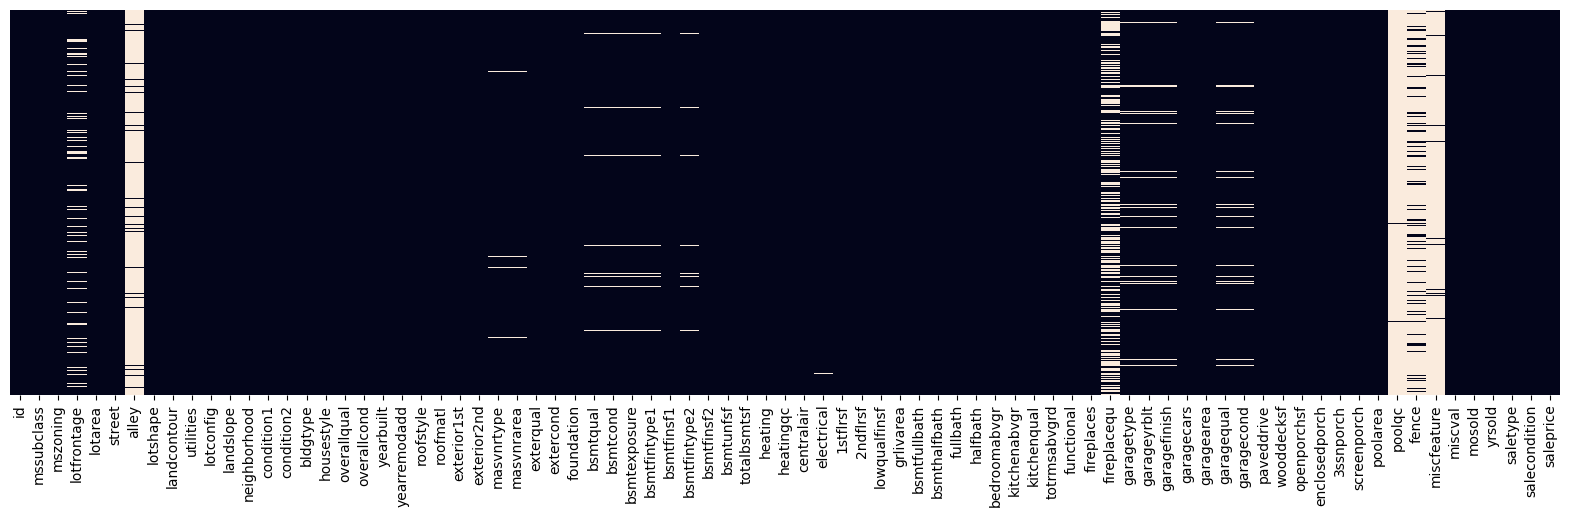

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

Looking into the features with missing values, the existence of null values does not indicate absence of a data entry but rather an indication of lack of that particular feature.

Reference : Data documentation.





The missing data matrix also reveals relationships between the missing values.
This is due to the lack of a particular feature leading to lack of corresponding characteristics of that feature. ie No garage - No garage yr built - Garage Finish year. 

**Exploring Categorical variables.**

In [ ]:
cat_df = df.select_dtypes(include='object')
cat_df

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,fireplacequ,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
missing_cat = (cat_df.isnull().mean() * 100).sort_values(ascending=False)
missing_cat = pd.DataFrame({'Percentage':missing_cat})
missing_cat.index.name = 'Feature'
missing_cat = missing_cat[missing_cat['Percentage'] > 0]
missing_cat = missing_cat.reset_index()


Text(0.5, 1.0, 'Percentage missingness within Categorical variables')

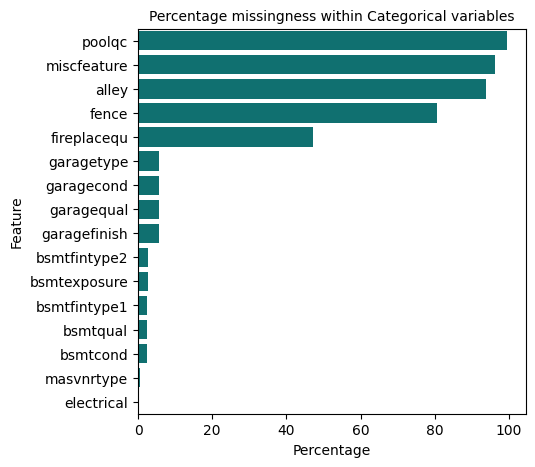

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='Percentage',y='Feature',data=missing_cat,color='teal')
plt.title('Percentage missingness within Categorical variables',fontsize=10)

**Exploring Numerical variables**.

In [ ]:
num_df = df.select_dtypes(exclude='object')
num_df

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
missing_num = (num_df.isnull().mean() * 100).sort_values(ascending=False)
missing_num = pd.DataFrame({'Percentage':missing_num})
missing_num.index.name = 'Feature'
missing_num = missing_num[missing_num['Percentage'] > 0]
missing_num = missing_num.reset_index()

Text(0.5, 1.0, 'Percentage missingness within Numerical variables')

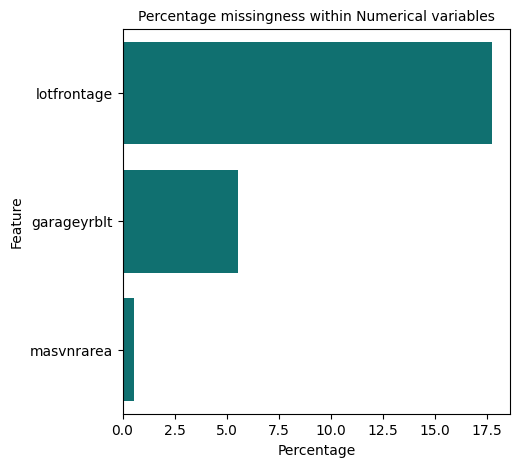

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='Percentage',y='Feature',data=missing_num,color='teal')
plt.title('Percentage missingness within Numerical variables',fontsize=10)

**Handling missing data.**

<Axes: >

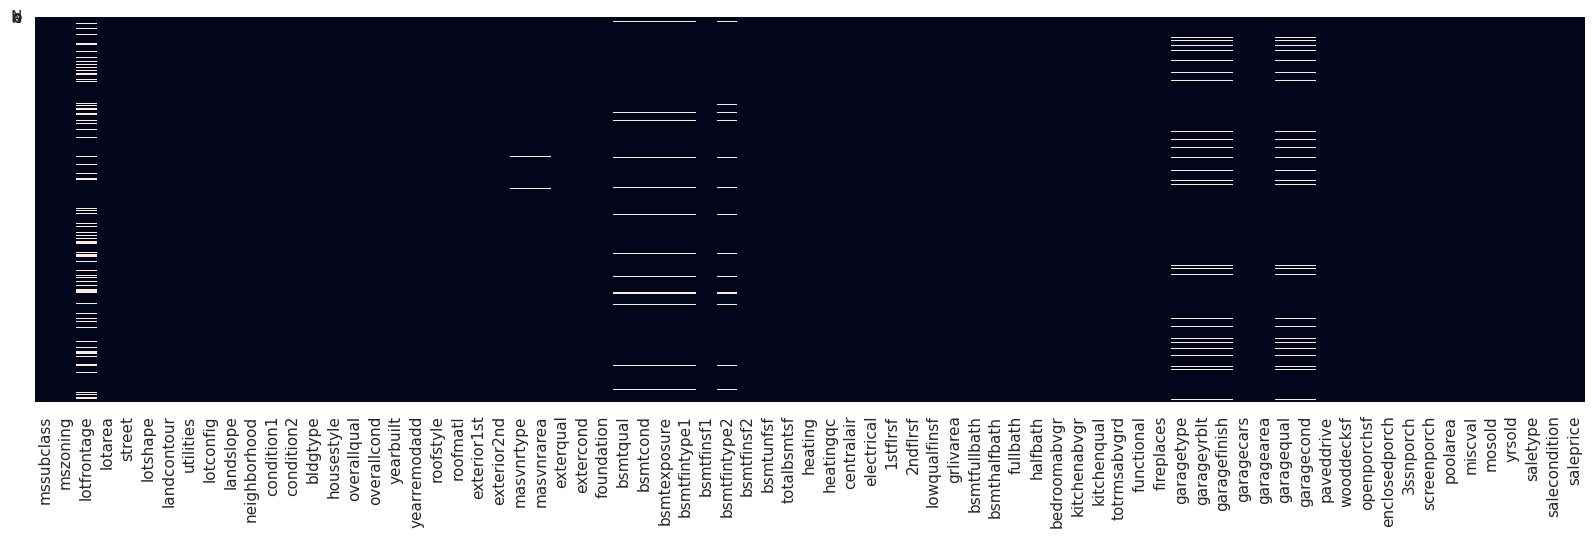

In [ ]:
df = df.drop(["id", "miscfeature", "fence", "poolqc", "fireplacequ", "alley"], axis=1)
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(), yticklabels="None", cbar=False)

**Visualizing the distribution of numerical features to select appropriate imputation method.**

Text(0.5, 0, 'masvnrarea')

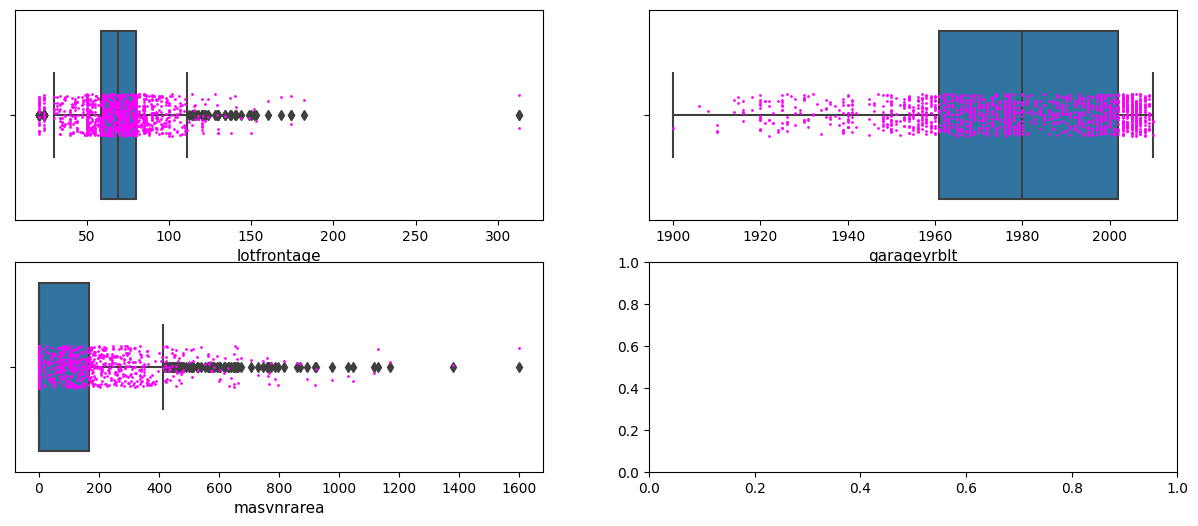

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(15,6))
sns.boxplot(x='lotfrontage',data=df,ax=ax[0,0])
sns.stripplot(x='lotfrontage',data=df,color='magenta',size=2,ax=ax[0,0])
ax[0,0].set_xlabel('lotfrontage',fontsize=11)
sns.boxplot(x='garageyrblt',data=df,ax=ax[0,1])
sns.stripplot(x='garageyrblt',data=df,color='magenta',size=2,ax=ax[0,1])
ax[0,1].set_xlabel('garageyrblt',fontsize=11)
sns.boxplot(x='masvnrarea',data=df,ax=ax[1,0])
sns.stripplot(x='masvnrarea',data=df,color='magenta',size=2,ax=ax[1,0])
ax[1,0].set_xlabel('masvnrarea',fontsize=11)

We'll go with the mean imputation method for 'garageyrblt' given the absence of outliers within its distribution, but we'll employ a medain imputer for the other features.

In [ ]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
df['lotfrontage'] = median_imputer.fit_transform(df['lotfrontage'].values.reshape(-1,1))
df['garageyrblt'] = mean_imputer.fit_transform(df['garageyrblt'].values.reshape(-1,1))
df['masvnrarea'] = median_imputer.fit_transform(df['masvnrarea'].values.reshape(-1,1))

<Axes: >

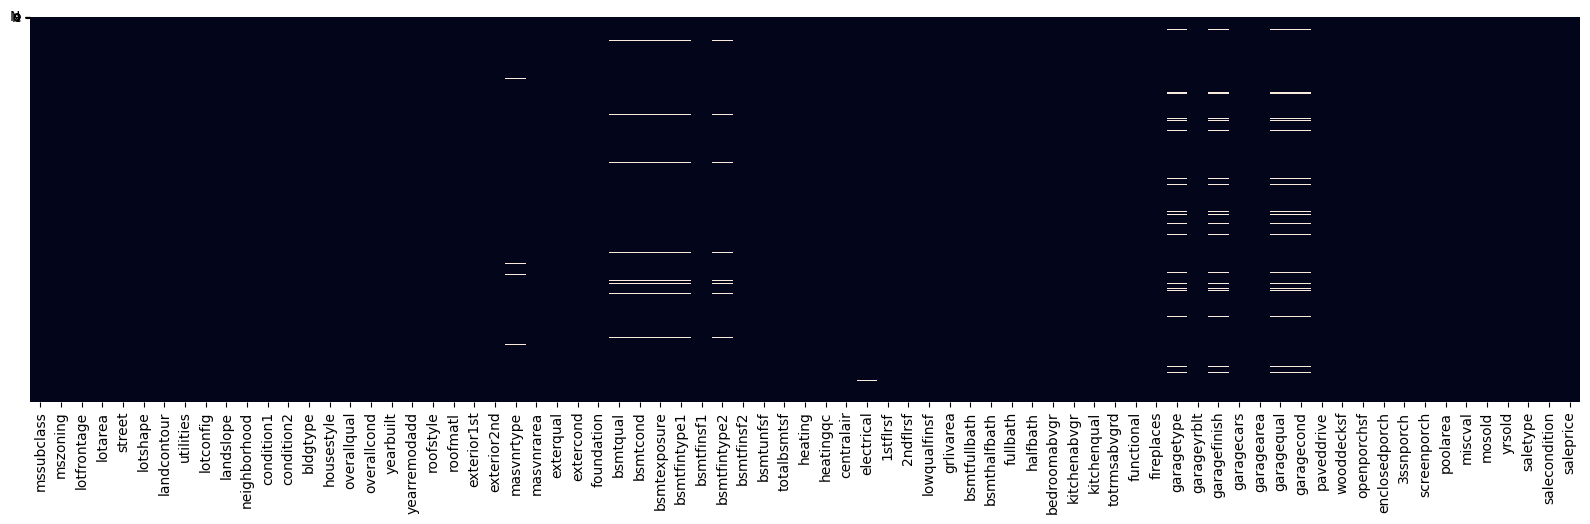

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(), yticklabels="None", cbar=False)

<Axes: >

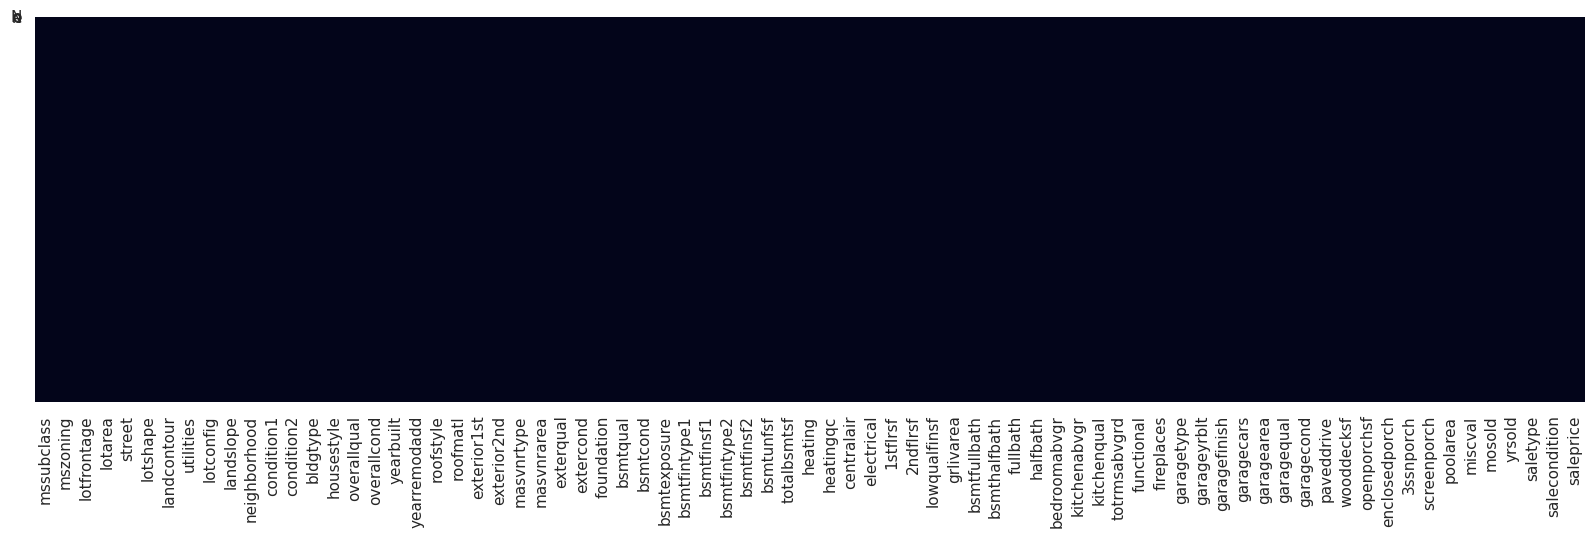

In [ ]:
mode_imputer = SimpleImputer(strategy='most_frequent')

miss_cat_cols = ['masvnrtype','bsmtqual','bsmtcond','bsmtexposure','bsmtfintype1','bsmtfintype2','electrical','garagetype','garagefinish','garagequal','garagecond']
for i in miss_cat_cols:
  df[i] = mode_imputer.fit_transform(df[i].values.reshape(-1,1))

plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(), yticklabels="None", cbar=False)


**Visualizing our target variable**.

Text(0.5, 0, 'SalePrice')

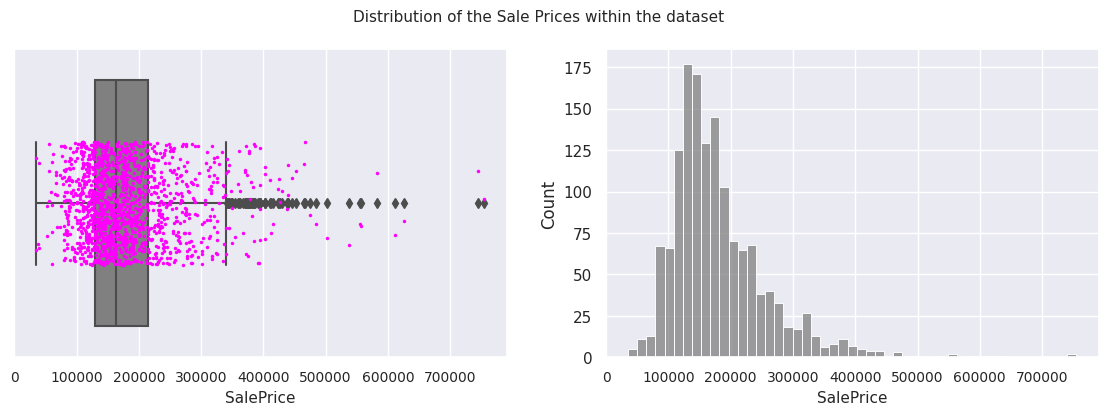

In [ ]:
sns.set(style='darkgrid')
fig,ax = plt.subplots(1,2,figsize=(14,4))
fig.suptitle('Distribution of the Sale Prices within the dataset',fontsize=11)
sns.boxplot(x=df['saleprice'],ax=ax[0],color='grey')
sns.stripplot(x=df['saleprice'],color='magenta',jitter=0.2,size=2.5,ax=ax[0])
ax[0].xaxis.set_tick_params(labelsize=10)
ax[0].set_xlabel('SalePrice',fontsize=11)
sns.histplot(x=df['saleprice'],ax=ax[1],color='grey')
ax[1].xaxis.set_tick_params(labelsize=10)
ax[1].set_xlabel('SalePrice',fontsize=11)

A look into the distribution of our target variable shows the existence of some outliers.

**Exploring relationships in our dataset.**

In [ ]:
num_df.head(3)

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500


**Encoding our data.**

First we take a look at our categorical features and the types of data they contain, ie ordinal or nominal.

In [ ]:
data = df.drop(['saleprice'],axis=1)

In [ ]:
cat_df = data.select_dtypes(include='object')
cat_df.head()

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,garagetype,garagefinish,garagequal,garagecond,paveddrive,saletype,salecondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
# cat_df.nunique()

In [ ]:
ord_data = ["mssubclass","lotshape","landcontour","landslope","overallqual","overallcond","exterqual","extercond","bsmtqual","bsmtcond","bsmtexposure","bsmtfintype1","bsmtfintype2","heatingqc","kitchenqual","garagefinish","garagequal","garagecond","paveddrive"]
non_ord, cat_data, num_data = list(), list(), list()

for i in cat_df.columns:
    if i not in ord_data:
        non_ord.append(i)


for i in range(len(non_ord)):
    if df[non_ord[i]].dtypes == "object":
        cat_data.append(non_ord[i])
    else:
        num_data.append(non_ord[i])


We can tell that majority of the features have less than 10 unique values.

On further analysis from the Data documentation, we notice the presence of both nominal and ordinal data which could influence our encoding method.

In [ ]:
col_tr = make_column_transformer((OrdinalEncoder(), ord_data),(OneHotEncoder(), cat_data), remainder="passthrough")
data = col_tr.fit_transform(data)

print(data.shape)


(1460, 217)


In [ ]:
final_df = pd.DataFrame(data)
final_df["saleprice"] = df['saleprice']

final_df.shape


(1460, 218)

In [ ]:
final_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,saleprice
0,5.0,3.0,3.0,0.0,6.0,4.0,2.0,4.0,2.0,3.0,3.0,2.0,5.0,0.0,2.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500
1,0.0,3.0,3.0,0.0,5.0,7.0,3.0,4.0,2.0,3.0,1.0,0.0,5.0,0.0,3.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500
2,5.0,0.0,3.0,0.0,6.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,5.0,0.0,2.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500
3,6.0,0.0,3.0,0.0,6.0,4.0,3.0,4.0,3.0,1.0,3.0,0.0,5.0,2.0,2.0,2.0,4.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000
4,5.0,0.0,3.0,0.0,7.0,4.0,2.0,4.0,2.0,3.0,0.0,2.0,5.0,0.0,2.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000


**Feature Scaling.**

We'll be applying a robust scaler in case of outliers in our dataset.

In [ ]:
X = final_df.drop(labels = ['saleprice'],axis=1)
y = final_df['saleprice']

In [ ]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

X_sc = pd.DataFrame(X)
X_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216
0,0.166667,0.0,0.0,0.0,0.5,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.210526,-0.254076,0.652174,0.243243,1.193303,0.452790,0.0,-0.559829,-0.269652,-0.453608,1.173077,0.0,0.380070,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.628047,0.0,0.281573,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0
1,-0.666667,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,-2.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.578947,0.030015,0.065217,-0.486486,0.000000,0.834679,0.0,-0.330769,0.538308,0.343643,0.000000,0.0,-0.312090,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.064261,0.0,-0.082816,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5
2,0.166667,-1.0,0.0,0.0,0.5,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.052632,0.437624,0.608696,0.216216,0.986301,0.143910,0.0,-0.074359,-0.142289,-0.327933,1.189560,0.0,0.497489,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.576765,0.0,0.530021,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
3,0.333333,-1.0,0.0,0.0,0.5,0.0,0.0,0.0,1.0,-2.0,0.0,-0.5,0.0,0.5,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,-0.473684,0.017663,-1.260870,-0.648649,0.000000,-0.235170,0.0,0.106838,-0.468657,-0.247423,1.038462,0.0,0.390885,1.0,0.0,-1.0,0.0,0.0,0.0,0.5,0.0,0.499842,1.0,0.670807,0.000000,0.147059,272.0,0.0,0.0,0.0,0.0,-1.333333,-1.0
4,0.166667,-1.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.789474,1.181201,0.586957,0.162162,2.130898,0.381186,0.0,0.021368,0.305473,0.113893,1.446429,0.0,1.134029,1.0,0.0,0.0,1.0,1.0,0.0,1.5,0.0,0.551124,1.0,1.474120,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0,2.000000,0.0


**Feature Selection**

Applying Variance threshold to select features with a high variance as they are the ones most likely to have an impact on our target.

In [ ]:
thresh = VarianceThreshold(threshold=0.5)
X_high = thresh.fit_transform(X_sc)
X_high

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -1.33333333e+00],
       [ 0.00000000e+00,  3.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -3.33333333e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 0.00000000e+00,  4.00000000e+00, -2.00000000e+00, ...,
         0.00000000e+00,  2.50000000e+03, -3.33333333e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -6.66666667e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
X_high.shape

(1460, 29)

In [ ]:
mod_df = pd.DataFrame(X_high)
mod_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-0.210526,-0.254076,1.193303,0.0,-0.559829,-0.269652,-0.453608,0.0,0.380070,0.0,1.0,0.0,0.281573,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0,-1.333333
1,0.0,3.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.578947,0.030015,0.000000,0.0,-0.330769,0.538308,0.343643,0.0,-0.312090,0.0,0.0,0.0,-0.082816,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0,-0.333333
2,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,-0.052632,0.437624,0.986301,0.0,-0.074359,-0.142289,-0.327933,0.0,0.497489,0.0,0.0,0.0,0.530021,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,1.000000
3,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,-0.473684,0.017663,0.000000,0.0,0.106838,-0.468657,-0.247423,0.0,0.390885,0.0,0.5,1.0,0.670807,0.000000,0.147059,272.0,0.0,0.0,0.0,0.0,-1.333333
4,0.0,0.0,0.0,0.0,-3.0,0.0,-1.0,0.0,0.789474,1.181201,2.130898,0.0,0.021368,0.305473,0.113893,0.0,1.134029,1.0,1.5,1.0,1.474120,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0,2.000000


# **Modelling**

In [ ]:
X = mod_df
y = final_df['saleprice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape,X_test.shape)

(1095, 29) (365, 29)


**Linear Regression**

In [ ]:
model = LinearRegression()
scores = cross_val_score(model,X_train,y_train,cv=10,scoring='r2')
print(scores,scores.mean())

[-0.38493622  0.79665323  0.82389069  0.8458722   0.8142173   0.86329176
  0.76279613  0.773659    0.83477862  0.80087776] 0.6931100476312742


In [ ]:
pipe = make_pipeline(PolynomialFeatures(degree=1), Ridge(alpha=80))
scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring="r2")

print(scores, scores.mean())

[-0.14071582  0.76761856  0.82352679  0.84689344  0.78153162  0.86263467
  0.79086168  0.76651588  0.82348102  0.79986479] 0.7122212643424556


**Gradient Boosting Regressor**

In [ ]:
model = GradientBoostingRegressor()
scores = cross_val_score(model,X_train,y_train,cv=10,scoring='r2')
print(scores,scores.mean())

[0.58254837 0.84224259 0.90817042 0.85064742 0.88342676 0.92536947
 0.83563658 0.8281765  0.87705169 0.86635419] 0.8399623976899443


**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=10)
scores = cross_val_score(model,X_train,y_train,cv=10,scoring='r2')
print(scores,scores.mean())

[0.77304024 0.83053469 0.87568216 0.83446285 0.8557338  0.87455784
 0.7957713  0.79294302 0.86653626 0.83303366] 0.8332295812189789


In [ ]:
model = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
y_pred = model.predict((X_test))

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

1586687865.8518631
0.677251426428729


In [ ]:
model = GradientBoostingRegressor().fit(X_train, y_train)
y_pred = model.predict((X_test))

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

1247260670.420522
0.7462943967031297
